In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
t = tf.constant([[1., 2., 3.],[4., 5., 6.]])
t

<tf.Tensor: id=0, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [6]:
tf.constant(9)

<tf.Tensor: id=2, shape=(), dtype=int32, numpy=9>

In [7]:
t.shape, t.dtype

(TensorShape([2, 3]), tf.float32)

In [12]:
t[:, 1]

<tf.Tensor: id=13, shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [21]:
t[1,2, tf.newaxis]

<tf.Tensor: id=44, shape=(1,), dtype=float32, numpy=array([6.], dtype=float32)>

In [22]:
t[...,:2, tf.newaxis]

<tf.Tensor: id=48, shape=(2, 2, 1), dtype=float32, numpy=
array([[[1.],
        [2.]],

       [[4.],
        [5.]]], dtype=float32)>

In [24]:
t+10, tf.square(t)

(<tf.Tensor: id=52, shape=(2, 3), dtype=float32, numpy=
 array([[11., 12., 13.],
        [14., 15., 16.]], dtype=float32)>,
 <tf.Tensor: id=53, shape=(2, 3), dtype=float32, numpy=
 array([[ 1.,  4.,  9.],
        [16., 25., 36.]], dtype=float32)>)

In [25]:
t@tf.transpose(t)

<tf.Tensor: id=56, shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [27]:
k = keras.backend
k

<module 'tensorflow_core.keras.backend' from 'C:\\Users\\user\\Anaconda3\\Lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\backend\\__init__.py'>

In [28]:
k.square(t)

<tf.Tensor: id=57, shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [29]:
a = np.array([4,5,6])
tf.constant(a)

<tf.Tensor: id=58, shape=(3,), dtype=int32, numpy=array([4, 5, 6])>

In [30]:
t, t.numpy()

(<tf.Tensor: id=9, shape=(2, 3), dtype=float32, numpy=
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32)>,
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32))

In [32]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [33]:
try :
    tf.constant(2.0)+tf.constant(4)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [34]:
# tf.float32 is the default dtype in tensorflow
try :
    tf.constant(2.0)+tf.constant(4.0, dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


In [35]:
tf.constant(2.0)+tf.cast(tf.constant(4.0, dtype=tf.float64), tf.float32)

<tf.Tensor: id=66, shape=(), dtype=float32, numpy=6.0>

## Strings

In [37]:
tf.constant(b'hello World')

<tf.Tensor: id=67, shape=(), dtype=string, numpy=b'hello World'>

In [42]:
tf.constant('café')

<tf.Tensor: id=71, shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [49]:
u = tf.constant([ord(c) for c in 'café'])
u

<tf.Tensor: id=74, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [52]:
b = tf.strings.unicode_encode(u, 'UTF-8')
b

<tf.Tensor: id=84, shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [57]:
tf.strings.length(b, unit='UTF8_CHAR')

<tf.Tensor: id=87, shape=(), dtype=int32, numpy=4>

In [64]:
tf.strings.unicode_decode(b, 'UTF-8')

<tf.Tensor: id=95, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [65]:
tf.strings.unicode_decode(tf.constant('café'), 'UTF-8')

<tf.Tensor: id=100, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [66]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: id=102, shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [68]:
r = tf.strings.unicode_decode(p, 'UTF-8')
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [69]:
r[1]

<tf.Tensor: id=133, shape=(6,), dtype=int32, numpy=array([ 67, 111, 102, 102, 101, 101])>

In [73]:
r2 = tf.ragged.constant([[5, 6], [], [3, 7, 9], [45]])
tf.concat([r, r2], axis = 0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [5, 6], [], [3, 7, 9], [45]]>

In [74]:
tf.concat([r, r2], axis=1)

<tf.RaggedTensor [[67, 97, 102, 233, 5, 6], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232, 3, 7, 9], [21654, 21857, 45]]>

In [75]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
r3

<tf.RaggedTensor [[68, 69, 70], [71], [], [72, 73]]>

In [76]:
tf.strings.unicode_encode(r3, 'UTF-8')

<tf.Tensor: id=255, shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [78]:
r.to_tensor()

<tf.Tensor: id=320, shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

## Sparse-Tensor

In [115]:
s = tf.SparseTensor(indices=[[0,0], [1,2], [2,3]],
               values=[3., 5., 9.], dense_shape=[3,5])
print(s)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([3. 5. 9.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 5], shape=(2,), dtype=int64))


In [116]:
tf.sparse.to_dense(s)

<tf.Tensor: id=398, shape=(3, 5), dtype=float32, numpy=
array([[3., 0., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 9., 0.]], dtype=float32)>

In [119]:
s2 = s*2
print(tf.sparse.to_dense(s2))

tf.Tensor(
[[ 6.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.]
 [ 0.  0.  0. 18.  0.]], shape=(3, 5), dtype=float32)


In [120]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [121]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.], [4., 5.]])
tf.sparse.sparse_dense_matmul(s2, s4)

<tf.Tensor: id=408, shape=(3, 2), dtype=float32, numpy=
array([[  60.,  120.],
       [ 500.,  600.],
       [1260., 1440.]], dtype=float32)>

In [122]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [123]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order [Op:SparseToDense]


In [124]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: id=417, shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [127]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
a = tf.sets.union(set1, set2)
print(a)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [1 0]
 [1 1]
 [1 2]
 [1 3]], shape=(10, 2), dtype=int64), values=tf.Tensor([ 2  3  4  5  6  7  0  7  9 10], shape=(10,), dtype=int32), dense_shape=tf.Tensor([2 6], shape=(2,), dtype=int64))


In [128]:
tf.sparse.to_dense(a)

<tf.Tensor: id=434, shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [129]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: id=439, shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [130]:
tf.sparse.to_dense(tf.sets.difference(set2, set1))

<tf.Tensor: id=444, shape=(2, 2), dtype=int32, numpy=
array([[ 4,  6],
       [10,  0]])>

In [131]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: id=449, shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

## Variables

In [133]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [134]:
v.assign(v+2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>

In [135]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>

In [138]:
v[:, 1].assign([5, 3])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[3., 5., 5.],
       [6., 3., 8.]], dtype=float32)>

In [142]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [145]:
v.scatter_nd_update(indices=[[0,1], [1,1]],
                   updates=[10, 20])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 3., 10.,  5.],
       [ 6., 20.,  8.]], dtype=float32)>

In [147]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
print(sparse_delta)

IndexedSlices(indices=[1, 0], values=[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])


In [148]:
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

## Tensor Arrays

In [149]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [150]:
array.read(1)

<tf.Tensor: id=518, shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [152]:
print(array.stack())

tf.Tensor(
[[1. 2.]
 [0. 0.]
 [5. 7.]], shape=(3, 2), dtype=float32)


In [157]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
print(mean, variance)

tf.Tensor([2. 3.], shape=(2,), dtype=float32) tf.Tensor([4.6666665 8.666667 ], shape=(2,), dtype=float32)


# Custom Loss Function

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [19]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

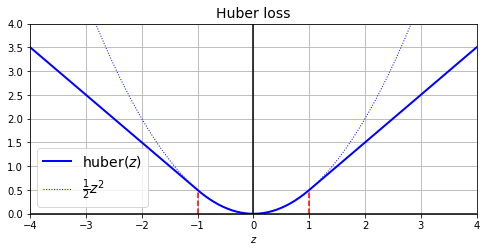

In [5]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [28]:
input_shape = X_train.shape[1:]
input_shape

(8,)

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 8s 693us/sample - loss: 0.6029 - mae: 0.9656 - val_loss: 0.2980 - val_mae: 0.5886
Epoch 2/2
11610/11610 [==============================] - 6s 477us/sample - loss: 0.2112 - mae: 0.5049 - val_loss: 0.2554 - val_mae: 0.5387


In [164]:
model.save("Saved_Models/my_model_with_a_custom_loss.h5")

In [165]:
model = keras.models.load_model("Saved_Models/my_model_with_a_custom_loss.h5",
                               custom_objects = {'huber_fn': huber_fn})

In [166]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 6s 548us/sample - loss: 0.2033 - mae: 0.4918 - val_loss: 0.2198 - val_mae: 0.5031
Epoch 2/2
11610/11610 [==============================] - 5s 448us/sample - loss: 0.1964 - mae: 0.4830 - val_loss: 0.1906 - val_mae: 0.4707


In [48]:
def create_huber_fn(threshold):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)   
    return huber_fn

In [168]:
model.compile(loss=create_huber_fn(2.0), optimizer="nadam", metrics=["mae"])

In [169]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 7s 623us/sample - loss: 0.2174 - mae: 0.4820 - val_loss: 0.2027 - val_mae: 0.4597
Epoch 2/2
11610/11610 [==============================] - 5s 471us/sample - loss: 0.2137 - mae: 0.4771 - val_loss: 0.2254 - val_mae: 0.4743


In [170]:
model.save("Saved_Models/my_model_with_a_custom_loss_threshold.h5")

In [173]:
model = keras.models.load_model("Saved_Models/my_model_with_a_custom_loss_threshold.h5",
                               custom_objects = {'huber_fn': create_huber_fn(2.0)})

In [174]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 7s 580us/sample - loss: 0.2105 - mae: 0.4730 - val_loss: 0.2253 - val_mae: 0.4722
Epoch 2/2
11610/11610 [==============================] - 5s 473us/sample - loss: 0.2095 - mae: 0.4713 - val_loss: 0.2064 - val_mae: 0.4679


In [8]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold":self.threshold}

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [10]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [11]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 8s 666us/sample - loss: 0.7750 - mae: 0.9363 - val_loss: 0.6181 - val_mae: 0.6894
Epoch 2/2
11610/11610 [==============================] - 6s 507us/sample - loss: 0.2548 - mae: 0.5156 - val_loss: 0.5356 - val_mae: 0.6383


In [12]:
model.save("Saved_Models/my_model_with_a_custom_loss_class.h5")

In [23]:
model = keras.models.load_model("Saved_Models/my_model_with_a_custom_loss_class.h5",
                               custom_objects={"HuberLoss": HuberLoss})

ValueError: Unknown loss function: HuberLoss

In [214]:
model.loss.threshold

2.0

# Other Custom Functions

In [3]:
def my_softplus(z): 
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [25]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [245]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_initializer=my_glorot_initializer),
])

In [246]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [247]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 8s 665us/sample - loss: 1.5711 - mae: 0.7967 - val_loss: inf - val_mae: inf
Epoch 2/2
11610/11610 [==============================] - 6s 529us/sample - loss: 0.6216 - mae: 0.4906 - val_loss: inf - val_mae: inf


In [248]:
model.save("Saved_Models/my_model_with_many_custom_parts.h5")

In [249]:
model = keras.models.load_model(
    "Saved_Models/my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus  
    })

In [39]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    # Use __call__() for regularizers, initializers and constraints only 
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_initializer=my_glorot_initializer),
])

In [45]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 8s 708us/sample - loss: 1.2903 - mae: 0.7818 - val_loss: 0.5351 - val_mae: 0.4897
Epoch 2/2
11610/11610 [==============================] - 6s 541us/sample - loss: 0.5222 - mae: 0.4925 - val_loss: 0.4728 - val_mae: 0.4605


In [46]:
model.save("Saved_Models/my_model_with_many_custom_parts.h5")

In [47]:
model = keras.models.load_model(
    "Saved_models/my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus
    })

# Custom Metrics

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [51]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber_fn(2.0)])

In [52]:
model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 7s 563us/sample - loss: 2.4511 - huber_fn: 1.0000
Epoch 2/2
11610/11610 [==============================] - 5s 391us/sample - loss: 0.5551 - huber_fn: 0.2664


In [55]:
model.compile(loss=create_huber_fn(2.0), optimizer="nadam", metrics=[create_huber_fn(2.0)])

sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 8s 708us/sample - loss: 0.1199 - huber_fn: 0.2376
Epoch 2/2
11610/11610 [==============================] - 6s 513us/sample - loss: 0.1156 - huber_fn: 0.2283


In [58]:
history.history.keys()

dict_keys(['loss', 'huber_fn'])

In [63]:
history.history['loss'], history.history['huber_fn'][0]*sample_weight.mean()

([0.11986541248068637, 0.11559693756080927], 0.11816436209437708)

## Streaming Metrics

In [68]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: id=38251, shape=(), dtype=float32, numpy=0.8>

In [69]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: id=38299, shape=(), dtype=float32, numpy=0.5>

In [70]:
precision.result()

<tf.Tensor: id=38309, shape=(), dtype=float32, numpy=0.5>

In [74]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [77]:
precision.reset_states()

In [126]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__()
        self.threshold = threshold
        #self.huber_fn = create_huber(threshold)
        self.total = self.add_weight('total', initializer='zeros')
        self.count = self.add_weight('count', initializer='zeros')
    def huber_fn(self, y_true, y_pred): # workaround
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}    

In [127]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: id=42479, shape=(), dtype=float32, numpy=14.0>

In [128]:
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: id=42512, shape=(), dtype=float32, numpy=7.0>

In [129]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [130]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [131]:
keras.backend.clear_session()

In [132]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [133]:
model.compile(loss=create_huber_fn(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [134]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 6s 537us/sample - loss: 0.8854 - huber_metric: 0.8854
Epoch 2/2
11610/11610 [==============================] - 5s 434us/sample - loss: 0.2472 - huber_metric: 0.2472


In [135]:
model.save("Saved_Models/my_model_with_a_custom_metric.h5")

In [136]:
model = keras.models.load_model("Saved_Models/my_model_with_a_custom_metric.h5",          
                                custom_objects={"huber_fn": create_huber_fn(2.0),
                                                "HuberMetric": HuberMetric})

TypeError: can only concatenate str (not "ABCMeta") to str

In [144]:
model.metrics[-1].threshold

2.0

In [148]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber_fn(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}  

In [149]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [150]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

In [151]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 6s 480us/sample - loss: 0.3931 - HuberMetric: 0.7922
Epoch 2/2
11610/11610 [==============================] - 5s 420us/sample - loss: 0.1184 - HuberMetric: 0.2386


In [152]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.39310489206299715, 0.39310474551595254)

In [154]:
model.save("Saved_Models/my_model_with_a_custom_metric_v2.h5")

In [156]:
model = keras.models.load_model("Saved_Models/my_model_with_a_custom_metric_v2.h5",       
                                custom_objects={"HuberMetric": HuberMetric})

TypeError: can only concatenate str (not "ABCMeta") to str

## Custom Layers

In [165]:
exp_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [166]:
exp_layer([-1., 0., 1.])

<tf.Tensor: id=59457, shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [168]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exp_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 7s 596us/sample - loss: 72801.0585 - val_loss: 1.1261
Epoch 2/5
11610/11610 [==============================] - 6s 491us/sample - loss: 1.7113 - val_loss: 0.7529
Epoch 3/5
11610/11610 [==============================] - 5s 415us/sample - loss: 1.5019 - val_loss: 0.5553
Epoch 4/5
11610/11610 [==============================] - 5s 393us/sample - loss: 1.4167 - val_loss: 0.5149
Epoch 5/5
11610/11610 [==============================] - 5s 392us/sample - loss: 1.3814 - val_loss: 0.4910
5160/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================

361.1047243333602

In [190]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation=keras.activations.get(activation)
        
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(name='kernel', shape=[batch_input_shape[-1], self.units],
                                     initializer='glorot_normal')
        self.bias = self.add_weight(name='bias', shape=[self.units], initializer='zeros')
        # To Tell the Model that the layer is built
        super().build(batch_input_shape)
        
    def call(self, X):
        return self.activation(X@self.kernel + self.bias)
    
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.to_list()[:-1], [self.units])
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'units':self.units,
               'activation':keras.activations.serialize(self.activation)}

In [191]:
keras.activations.serialize(keras.activations.relu)

'relu'

In [192]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [197]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 6s 553us/sample - loss: 1.6926 - val_loss: 8.4746
Epoch 2/2
11610/11610 [==============================] - 5s 428us/sample - loss: 0.6187 - val_loss: 1.9724
5160/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.49972469002701514

In [199]:
model.save("Saved_Models/my_model_with_a_custom_layer.h5")

In [200]:
model = keras.models.load_model("Saved_Models/my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

## Custom Models

In [4]:
X_new_scaled = X_test_scaled

In [5]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation='elu',
                         kernel_initializer = 'he_normal') for _ in range(n_layers)]
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return Z+inputs

In [8]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal')
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)
    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [39]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 11s 983us/sample - loss: 32.1477
Epoch 2/5
11610/11610 [==============================] - 8s 669us/sample - loss: 3.8094
Epoch 3/5
11610/11610 [==============================] - 8s 666us/sample - loss: 1.6364
Epoch 4/5
11610/11610 [==============================] - 8s 674us/sample - loss: 1.9481
Epoch 5/5
11610/11610 [==============================] - 8s 681us/sample - loss: 1.2244


In [40]:
model.summary()

Model: "residual_regressor_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             multiple                  270       
_________________________________________________________________
residual_block_19 (ResidualB multiple                  1860      
_________________________________________________________________
residual_block_20 (ResidualB multiple                  1860      
_________________________________________________________________
dense_66 (Dense)             multiple                  31        
Total params: 4,021
Trainable params: 4,021
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.layers

In [10]:
model.save("my_custom_model.ckpt")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


In [11]:
model = keras.models.load_model("my_custom_model.ckpt")

In [12]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 12s 1ms/sample - loss: 0.5089
Epoch 2/5
11610/11610 [==============================] - 8s 678us/sample - loss: 0.4028
Epoch 3/5
11610/11610 [==============================] - 8s 664us/sample - loss: 0.4073
Epoch 4/5
11610/11610 [==============================] - 7s 567us/sample - loss: 0.4277
Epoch 5/5
11610/11610 [==============================] - 7s 600us/sample - loss: 0.4034


In [36]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [37]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=3)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 10s 856us/sample - loss: 2.1423
Epoch 2/5
11610/11610 [==============================] - 7s 561us/sample - loss: 0.4785
Epoch 3/5
11610/11610 [==============================] - 6s 553us/sample - loss: 0.4524
Epoch 4/5
11610/11610 [==============================] - 6s 523us/sample - loss: 0.6343
Epoch 5/5
11610/11610 [==============================] - 6s 524us/sample - loss: 0.5605


In [38]:
# Model will get build during fitting if we don't provide the input_shape earlier
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             multiple                  270       
_________________________________________________________________
residual_block_17 (ResidualB multiple                  1860      
_________________________________________________________________
residual_block_18 (ResidualB multiple                  1860      
_________________________________________________________________
dense_60 (Dense)             multiple                  31        
Total params: 4,021
Trainable params: 4,021
Non-trainable params: 0
_________________________________________________________________


## Losses and Metrics Based on Model Internals

In [64]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        return self.out(Z)

In [65]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 11s 943us/sample - loss: 0.7068
Epoch 2/2
11610/11610 [==============================] - 8s 689us/sample - loss: 0.4270


## Computing Gradients with Autodiff


In [66]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [67]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [68]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [81]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z=f(w1, w2)
    
gradients = tape.gradient(z,[w1, w2])
gradients

[<tf.Tensor: id=58219, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=58211, shape=(), dtype=float32, numpy=10.0>]

In [83]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [84]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) 
del tape

In [86]:
dz_dw1, dz_dw2

(<tf.Tensor: id=58267, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=58272, shape=(), dtype=float32, numpy=10.0>)

In [88]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[None, None]

In [90]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z=f(c1,c2)

gradients = tape.gradient(z, [c1, c2])

In [91]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: id=58396, shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: id=58397, shape=(), dtype=float32, numpy=30.0>]

In [92]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)

<tf.Tensor: id=58481, shape=(2,), dtype=float32, numpy=array([136.,  30.], dtype=float32)>

In [93]:
del tape

In [94]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

jacobians, hessians

([<tf.Tensor: id=58505, shape=(), dtype=float32, numpy=36.0>,
  <tf.Tensor: id=58497, shape=(), dtype=float32, numpy=10.0>],
 [[<tf.Tensor: id=58514, shape=(), dtype=float32, numpy=6.0>,
   <tf.Tensor: id=58516, shape=(), dtype=float32, numpy=2.0>],
  [<tf.Tensor: id=58521, shape=(), dtype=float32, numpy=2.0>, None]])

In [95]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: id=58541, shape=(), dtype=float32, numpy=30.0>, None]

In [96]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [97]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: id=58554, shape=(1,), dtype=float32, numpy=array([inf], dtype=float32)>,
 [<tf.Tensor: id=58563, shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

In [98]:
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [99]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: id=58580, shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: id=58601, shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])